# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [18]:
# Load pickled data
# import pickle

# # TODO: Fill this in based on where you saved the training and testing data

# training_file = "train.p"
# validation_file="valid.p"
# testing_file = "test.p"

# with open(training_file, mode='rb') as f:
#     train = pickle.load(f)
# with open(validation_file, mode='rb') as f:
#     valid = pickle.load(f)
# with open(testing_file, mode='rb') as f:
#     test = pickle.load(f)
    
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import glob
import numpy as np

y_train_valid_test =[]
X_train_valid_test =[]
for image_file in glob.iglob("./GTSRB/Final_Training/**/*.ppm" , recursive = True):
    y_train_valid_test.append(int(image_file.split('\\')[2]))
    image = cv2.imread(image_file)
    im = np.array(image)
    #print (im.shape)
    out_im = []
    im = cv2.resize(im,(32,32))
    X_train_valid_test.append(im)
    #print (im.shape)
print ("Number of all samples:" , len(y_train_valid_test))


Number of all samples: 39209


In [22]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train_valid_test, y_train_valid_test = shuffle(X_train_valid_test, y_train_valid_test)

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_train_valid_test,y_train_valid_test,test_size=0.4,train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,train_size=0.5)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [23]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = int(len(np.unique(y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 23525
Number of validation examples = 7842
Number of testing examples = 7842
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

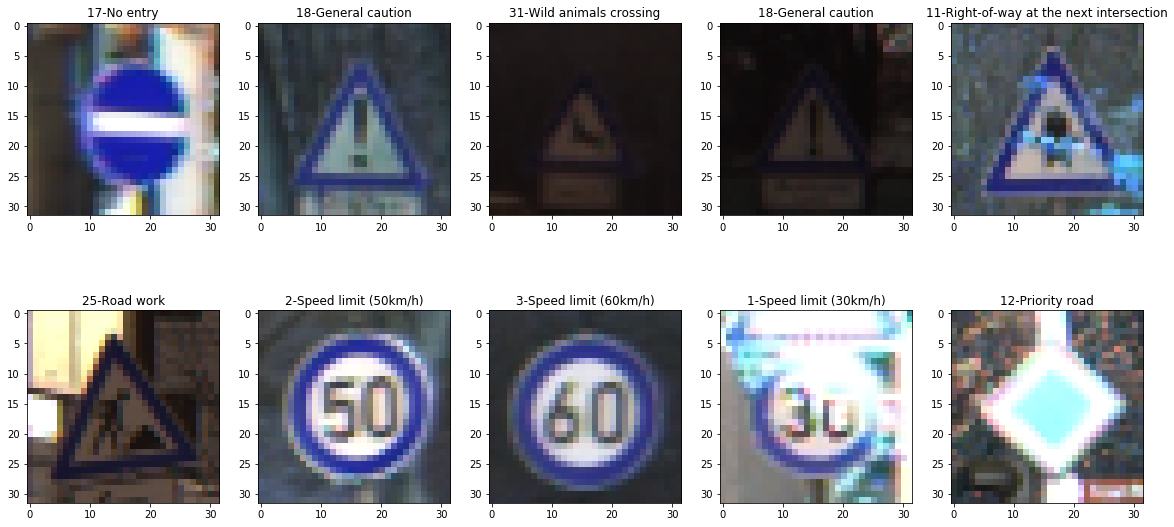

In [24]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import pandas as pd
%matplotlib inline
random.seed(9999)

df = pd.read_csv('signnames.csv')

def get_name(id):
    return str(str(id) + "-"+df[df.ClassId == id]['SignName'].tolist()[0])

plt.figure(figsize=(20,15))
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    plt.subplot(3,5,i+1)
    plt.title(get_name(y_train[index]))
    plt.imshow(image)

In [25]:
n_classes_data , count = np.unique(y_train,return_counts = True)
df['count'] = count[df['ClassId']]
df

ClassId                                           SignName  count
0         0                               Speed limit (20km/h)    125
1         1                               Speed limit (30km/h)   1321
2         2                               Speed limit (50km/h)   1345
3         3                               Speed limit (60km/h)    877
4         4                               Speed limit (70km/h)   1244
5         5                               Speed limit (80km/h)   1107
6         6                        End of speed limit (80km/h)    233
7         7                              Speed limit (100km/h)    887
8         8                              Speed limit (120km/h)    835
9         9                                         No passing    909
10       10       No passing for vehicles over 3.5 metric tons   1211
11       11              Right-of-way at the next intersection    767
12       12                                      Priority road   1276
13       13                                              Yield   1280
14       14                                               Stop    484
15       15                                        No vehicles    393
16       16           Vehicles over 3.5 metric tons prohibited    259
17       17                                           No entry    666
18       18                                    General caution    723
19       19                        Dangerous curve to the left    139
20       20                       Dangerous curve to the right    217
21       21                                       Double curve    193
22       22                                         Bumpy road    234
23       23                                      Slippery road    301
24       24                          Road narrows on the right    150
25       25                                          Road work    847
26       26                                    Traffic signals    364
27       27                                        Pedestrians    142
28       28                                  Children crossing    321
29       29                                  Bicycles crossing    148
30       30                                 Beware of ice/snow    268
31       31                              Wild animals crossing    469
32       32                End of all speed and passing limits    150
33       33                                   Turn right ahead    408
34       34                                    Turn left ahead    270
35       35                                         Ahead only    712
36       36                               Go straight or right    223
37       37                                Go straight or left    118
38       38                                         Keep right   1216
39       39                                          Keep left    183
40       40                               Roundabout mandatory    206
41       41                                  End of no passing    154
42       42  End of no passing by vehicles over 3.5 metric ...    150

<Container object of 43 artists>

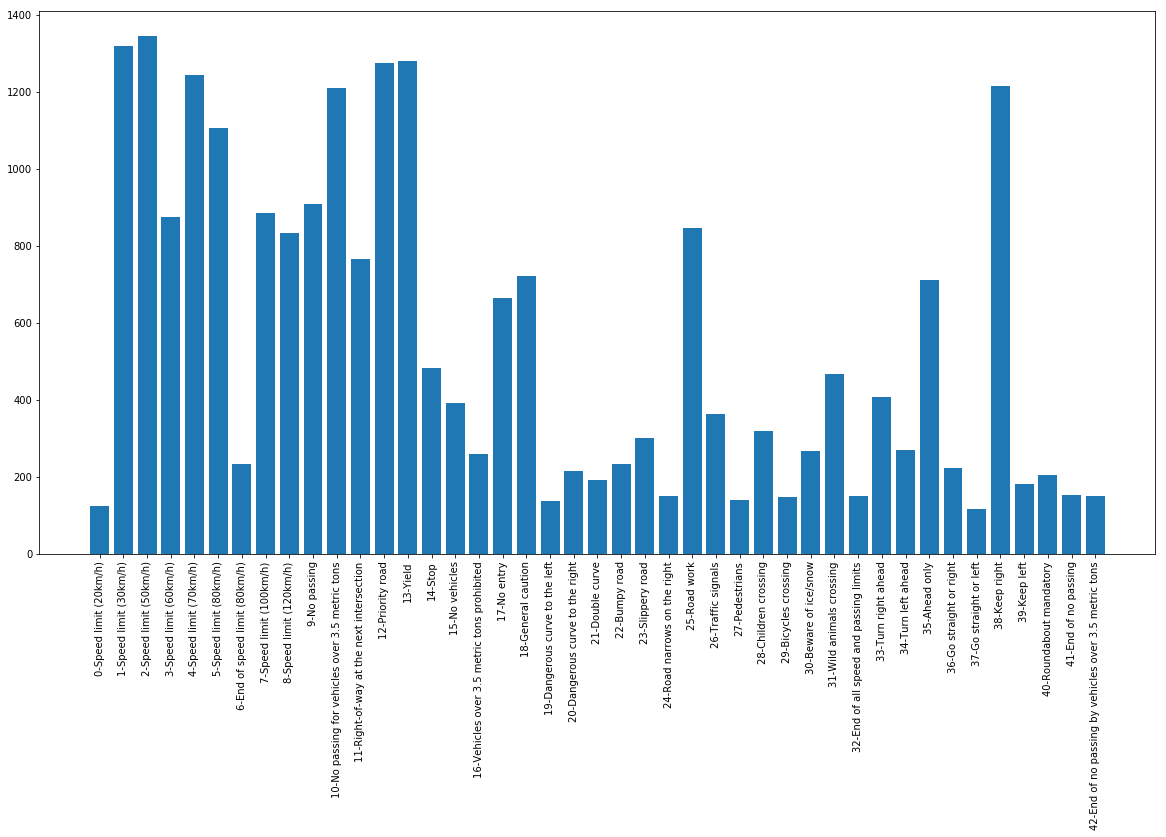

In [26]:
labels =[]
for i in range(n_classes):
    labels.append(get_name(i))
    

fig = plt.figure()
plt.figure(figsize=(20,10))
plt.xticks(n_classes_data, labels ,rotation='vertical')
plt.bar(n_classes_data , count)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [27]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize_image(image):
    maxx = 255
    minx = 0
    a=0.1
    b=0.9
    return a+(image-minx)*(b-a) / (maxx-minx)

#Simple pre processing step by denormalizing images
def pre_process_images(arr):
    arr = arr.astype('float32')
    for i in range(arr.shape[0]):
        arr[i] = normalize_image(arr[i])
    return arr
    

X_train = pre_process_images(X_train)
X_test = pre_process_images(X_test)
X_valid = pre_process_images(X_valid)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


### Model Architecture

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 15
BATCH_SIZE = 128

#Similar to LeNet with some mods:
#Multipling the output of convolution layers by 4 (was 6 for one channel , now they are 24)
#Adding one more fully conntect layer - a total of four to reduce from 1600 to 43
#implement dropout for all fully connected layers -  except for the flattining

def LeNet_traffic_sign(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    with tf.name_scope('Layer_1_conv') as scope:
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x24.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 24), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(24))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x24. Output = 14x14x24.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    with tf.name_scope('Layer_2_Conv') as scope:
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 64), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(64))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x64. Output = 1600.
    with tf.name_scope('Layer_3_flatten') as scope:
        fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 480.
    with tf.name_scope('Layer_4_FC1') as scope:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 480), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(480))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)
        #Adding dropout to see if it helps
        fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 480. Output = 240.
    with tf.name_scope('Layer_5_FC12') as scope:
        fc12_W  = tf.Variable(tf.truncated_normal(shape=(480, 240), mean = mu, stddev = sigma))
        fc12_b  = tf.Variable(tf.zeros(240))
        fc12    = tf.matmul(fc1, fc12_W) + fc12_b

        # SOLUTION: Activation.
        fc12    = tf.nn.relu(fc12)
        #Adding dropout to see if it helps
        fc12 = tf.nn.dropout(fc12, keep_prob)
    
    
    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 84.
    with tf.name_scope('Layer_6_FC2') as scope:
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(fc12, fc2_W) + fc2_b

        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)

        #Adding dropout to see if it helps
        fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    with tf.name_scope('Layer_7_out') as scope:
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

# Training Pipeline

Create a training pipeline that uses the model to classify the data.

In [29]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')

#implement dropoff
keep_prob = tf.placeholder(tf.float32) # probability to keep units
#Onr hot encoding for y
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

logits = LeNet_traffic_sign(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Visualize Network

In [30]:
#https://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
#show_graph(tf.get_default_graph().as_graph_def())

# Model Evaluation

In [31]:
predictions = tf.argmax(logits, 1)
correct_prediction = tf.equal(predictions, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y ,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Create a training pipeline that uses the model to classify the data.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y ,keep_prob: 0.75})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign_lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.689

EPOCH 2 ...
Validation Accuracy = 0.894

EPOCH 3 ...
Validation Accuracy = 0.938

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.974

EPOCH 6 ...
Validation Accuracy = 0.979

EPOCH 7 ...
Validation Accuracy = 0.979

EPOCH 8 ...
Validation Accuracy = 0.982

EPOCH 9 ...
Validation Accuracy = 0.982

EPOCH 10 ...
Validation Accuracy = 0.988

EPOCH 11 ...
Validation Accuracy = 0.986

EPOCH 12 ...
Validation Accuracy = 0.985

EPOCH 13 ...
Validation Accuracy = 0.991

EPOCH 14 ...
Validation Accuracy = 0.990

EPOCH 15 ...
Validation Accuracy = 0.991

Model saved


# Evaluating the model using the test set

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\traffic_sign_lenet
Test Accuracy = 0.992


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


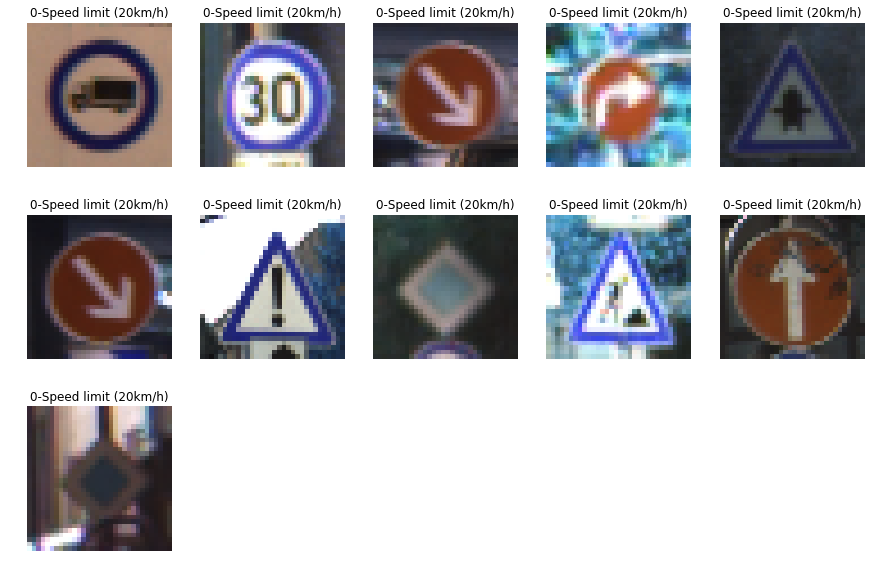

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import glob
y_extra_image_label =[]
X_extra_image_test =[]
for image_file in glob.iglob("./extra_images/part/**/*.ppm" , recursive = True):
    #y_extra_image_label.append(int(image_file.split('\\')[2]))
    y_extra_image_label.append(0) #there is no labeling provided
    image = cv2.imread(image_file)
    im = np.array(image)
    #print (im.shape)
    out_im = []
    im = cv2.resize(im,(32,32))
    X_extra_image_test.append(im)
    #print (im.shape)
print (y_extra_image_label)
plt.figure(figsize=(15,10))

for i in range(len(X_extra_image_test)):
    image = X_extra_image_test[i]
    plt.subplot(3,5,i+1)
    plt.axis('off')
    plt.title(get_name(y_extra_image_label[i]))
    plt.imshow(image)

### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_extra_image_test = np.array(X_extra_image_test).astype('float32')
X_extra_image_test = pre_process_images(X_extra_image_test)

### Analyze Performance

In [54]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_extra_image_test, y_extra_image_label)
    print("Test Accuracy (has to be 0 as there are no labels) = {:.3f}".format(test_accuracy))
    preds = predictions.eval(feed_dict={x: X_extra_image_test ,keep_prob: 1.0})
    

df2 = pd.DataFrame(columns=('Ground_Truth','Prediction'))
for i,image in enumerate(X_extra_image_test):
    df2.loc[i] ={'Ground_Truth' : get_name(y_extra_image_label[i]) , 'Prediction': get_name(preds[i])}
df2['Correct'] = df2.Ground_Truth == df2.Prediction
df2

INFO:tensorflow:Restoring parameters from .\traffic_sign_lenet
Test Accuracy (has to be 0 as there are no labels) = 0.000


Ground_Truth                                   Prediction  \
0   0-Speed limit (20km/h)  16-Vehicles over 3.5 metric tons prohibited   
1   0-Speed limit (20km/h)                       1-Speed limit (30km/h)   
2   0-Speed limit (20km/h)                                38-Keep right   
3   0-Speed limit (20km/h)                          33-Turn right ahead   
4   0-Speed limit (20km/h)     11-Right-of-way at the next intersection   
5   0-Speed limit (20km/h)                                38-Keep right   
6   0-Speed limit (20km/h)                           18-General caution   
7   0-Speed limit (20km/h)                             12-Priority road   
8   0-Speed limit (20km/h)                                 25-Road work   
9   0-Speed limit (20km/h)                                35-Ahead only   
10  0-Speed limit (20km/h)                             12-Priority road   

    Correct  
0     False  
1     False  
2     False  
3     False  
4     False  
5     False  
6     False  
7     False  
8     False  
9     False  
10    False

In [55]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

k = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probs = sess.run(tf.nn.softmax(logits),feed_dict={x: X_extra_image_test,y:y_extra_image_label,keep_prob: 1.0})
    topk = tf.nn.top_k(probs,k=k)
    sess.run(topk)

INFO:tensorflow:Restoring parameters from .\traffic_sign_lenet


### Output Top 5 Softmax Probabilities For Each Image Found on the Web
#### Looks good , it seems that we have a good model

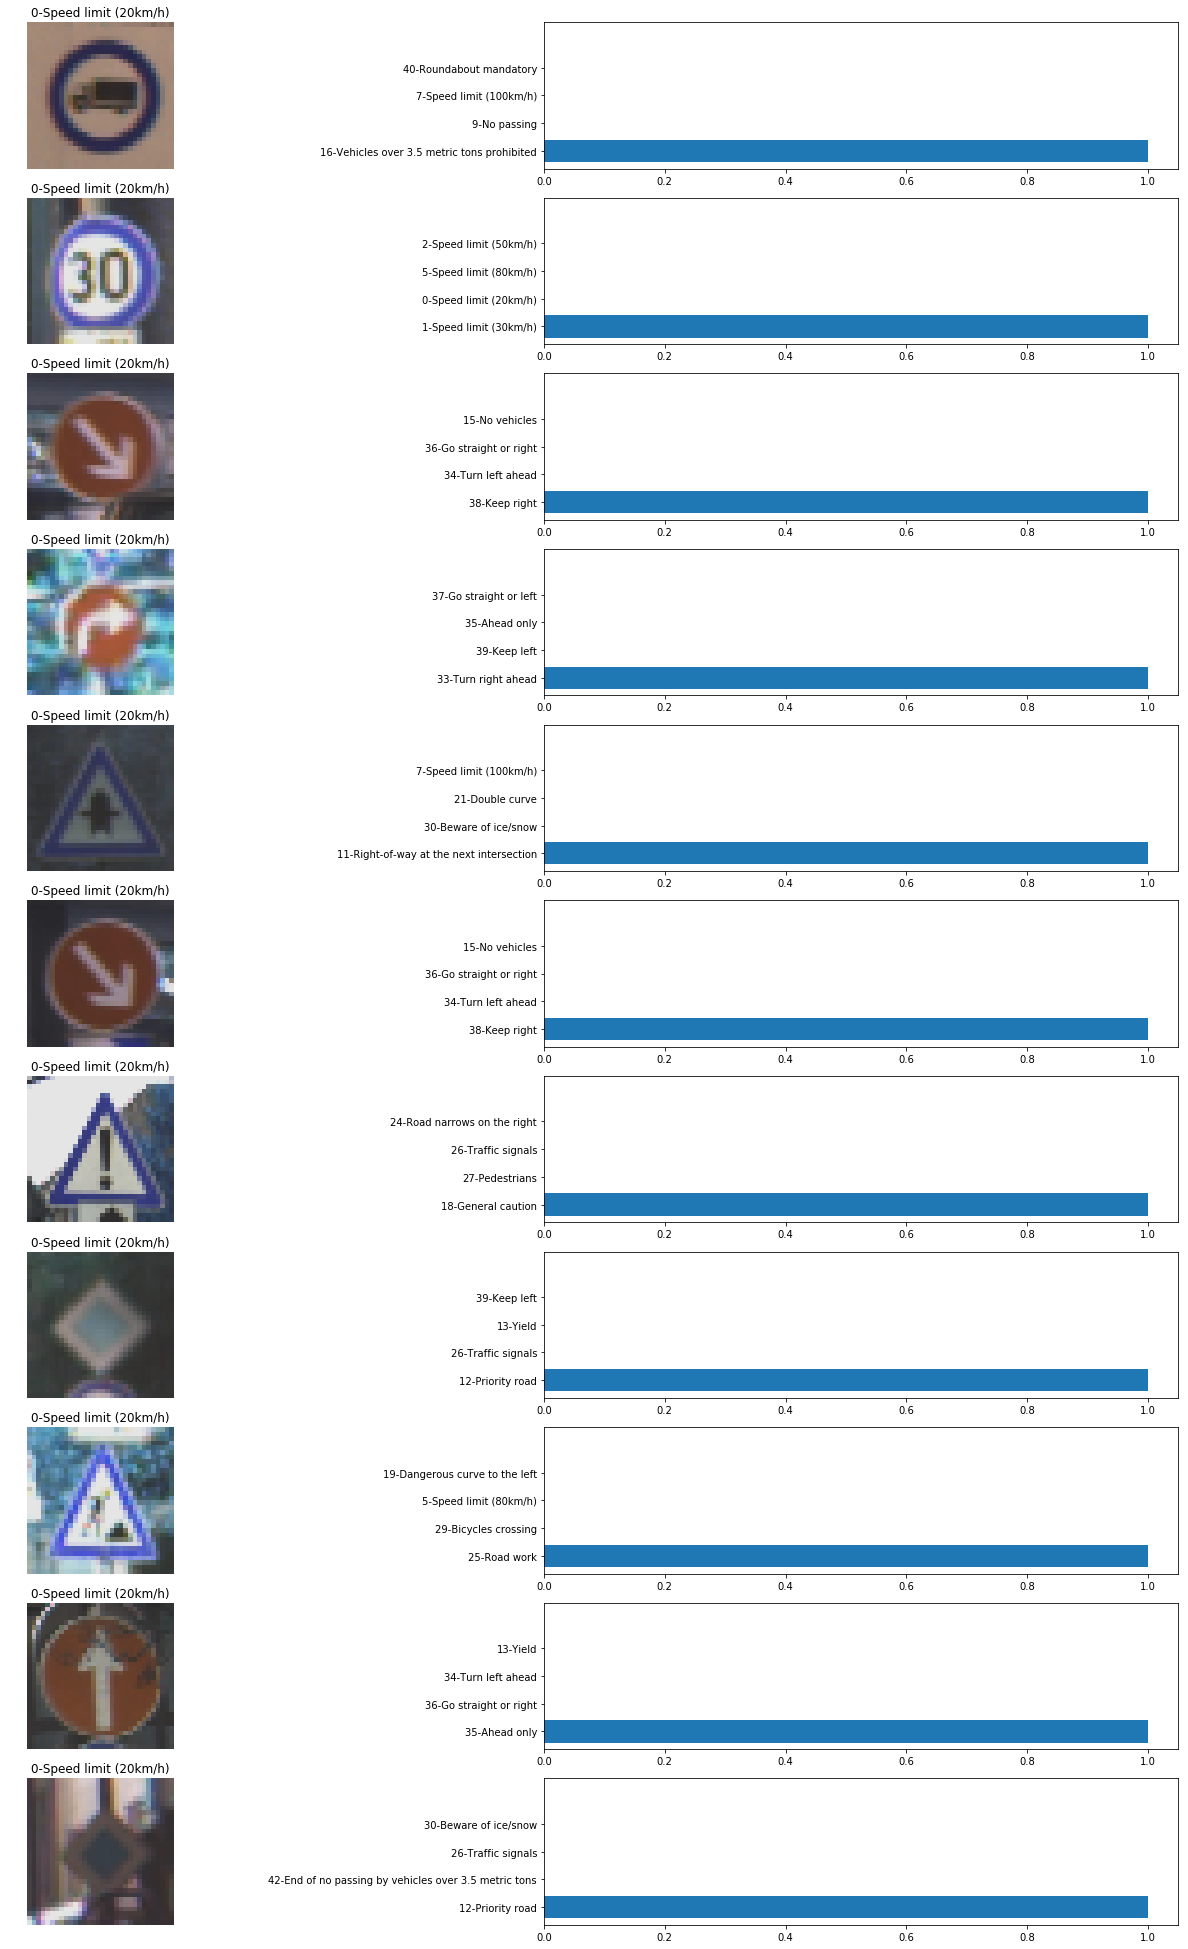

In [56]:
plt.figure(figsize=(25,35))
#fig = plt.figure()
#for i in range(len(X_extra_image_test)):
#fig, ax = plt.subplots(nrows=2,ncols=2)
image_count = len(X_extra_image_test)
with tf.Session() as sess:
    #print (topk.values[0].eval())
    for i in range(image_count):
        image = X_extra_image_test[i]
        plt.subplot(image_count,2,2*i+1)
        plt.axis('off')
        plt.title(get_name(y_extra_image_label[i]))
        plt.imshow(image)
        image = X_extra_image_test[i]
        plt.subplot(image_count,2,2*i+2)
        plt.barh(np.arange(1,k+1,1) , topk.values[i].eval())
        sub_labels = [labels[i] for i in topk.indices[i].eval()]
        plt.yticks(np.arange(1,k,1) , sub_labels ,rotation='horizontal')
        

### Visually inspect the first 100 sample of the final test dataset
#### Looks good also.....

INFO:tensorflow:Restoring parameters from .\traffic_sign_lenet


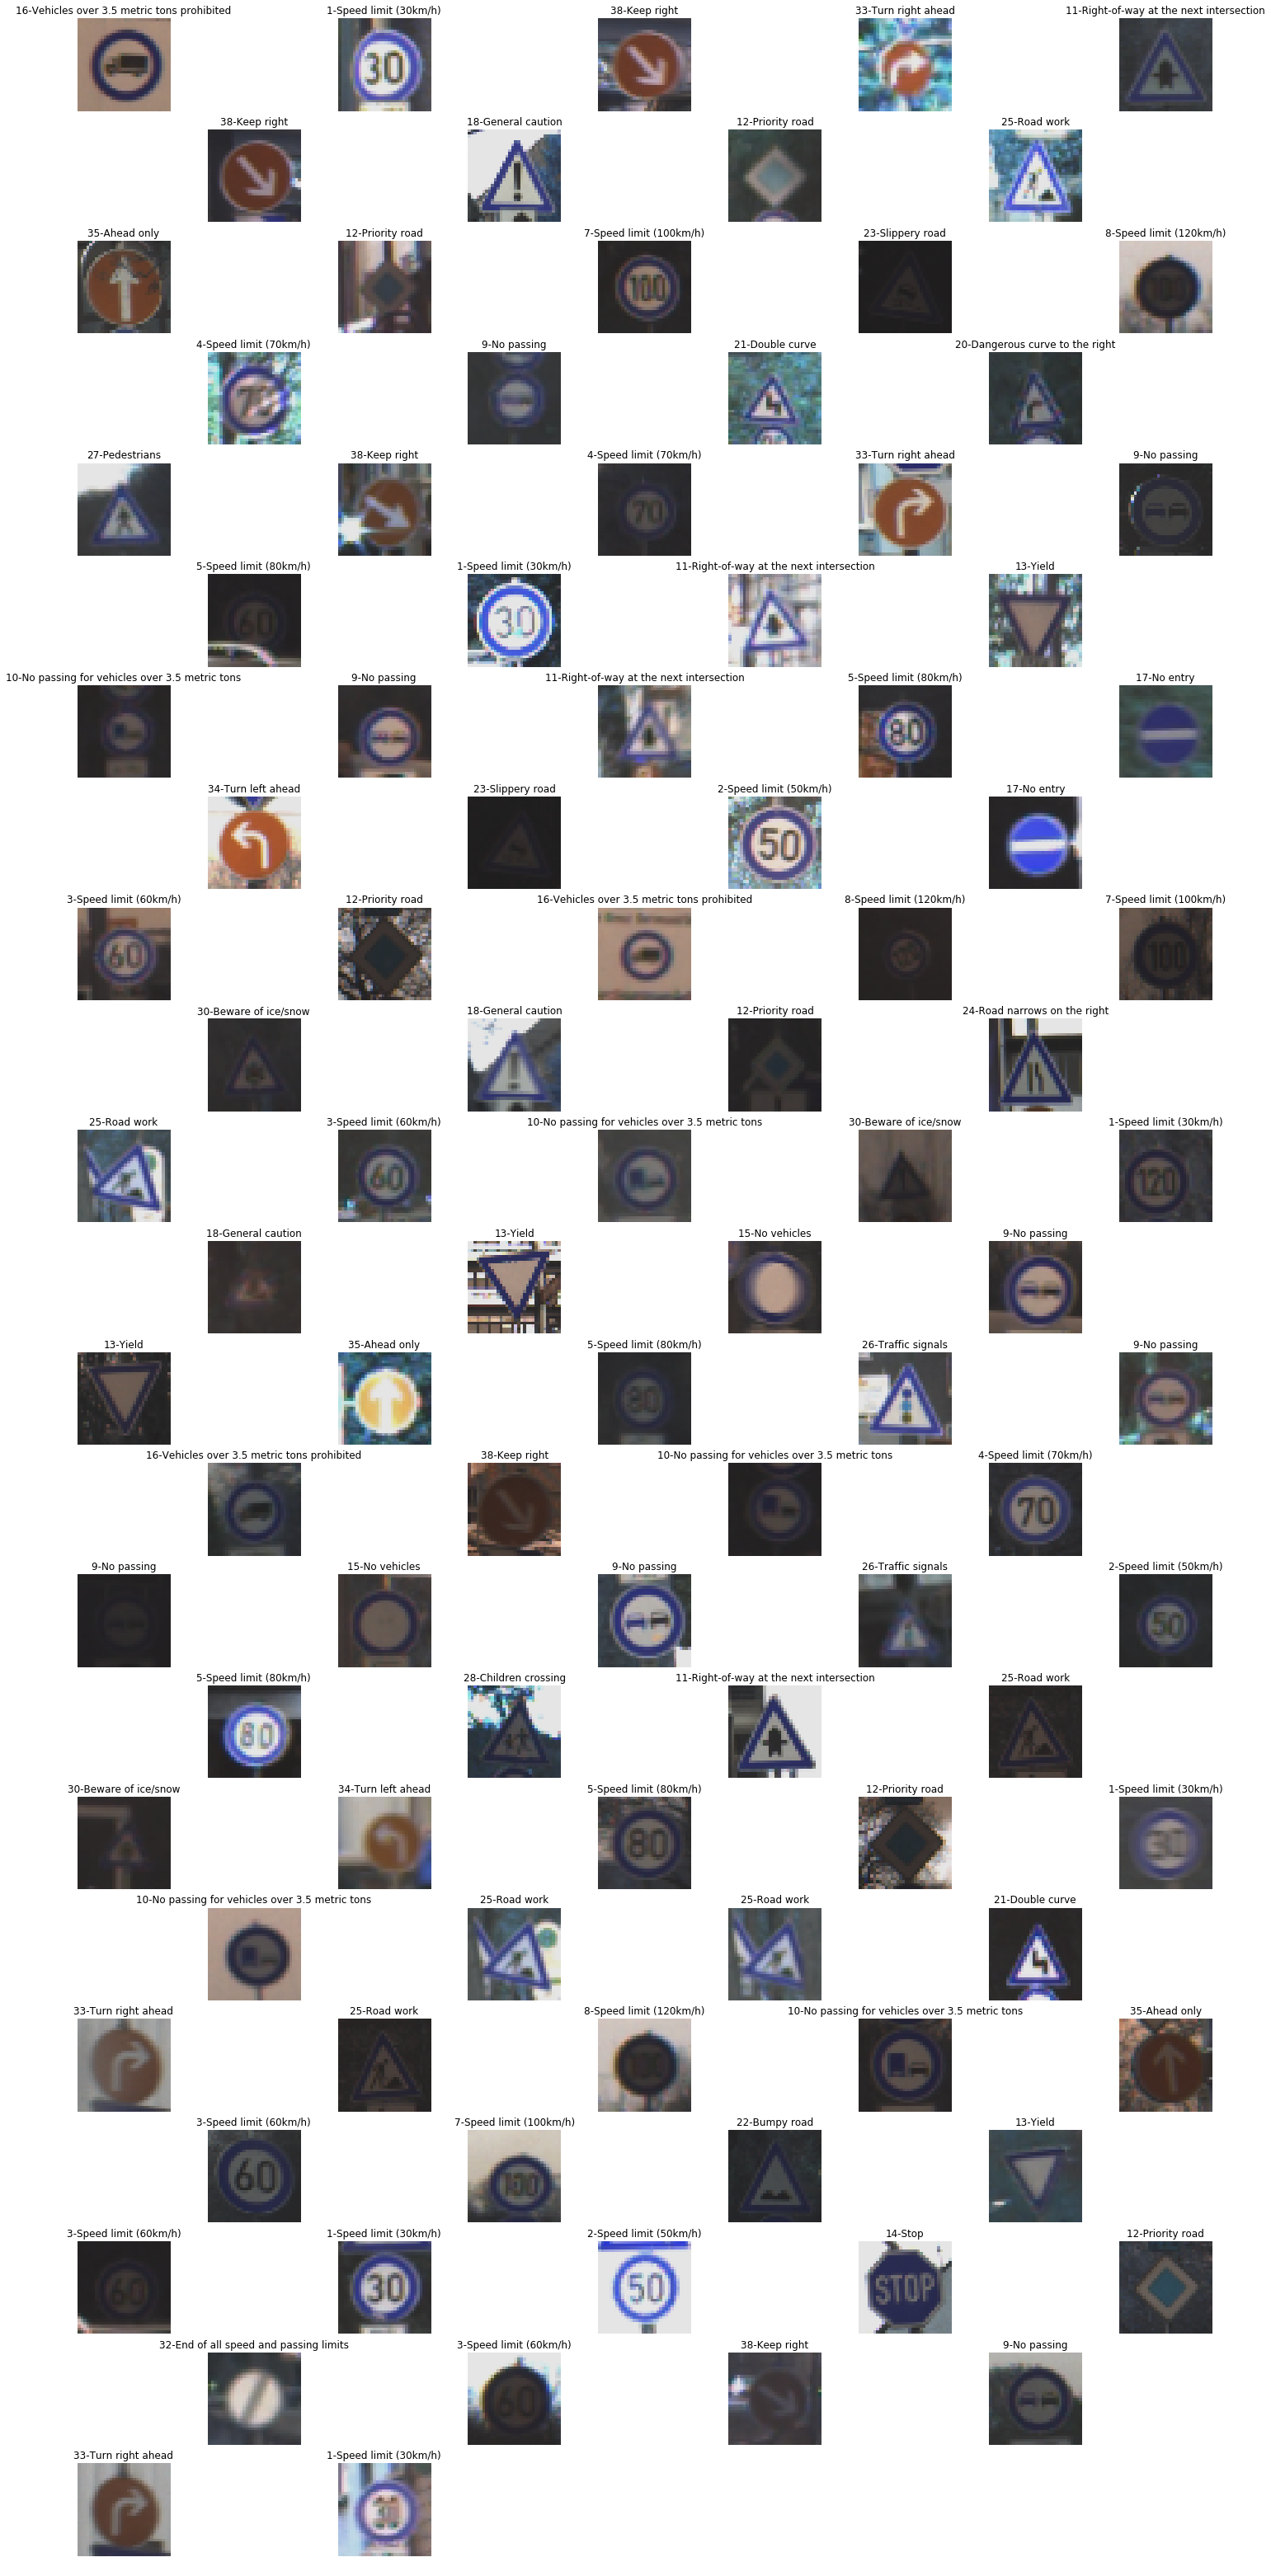

In [53]:
y_extra_image_label2 =[]
X_extra_image_test2 =[]

for image_file in glob.iglob("./extra_images/images/**/*.ppm" , recursive = True):
    #y_extra_image_label.append(int(image_file.split('\\')[2]))
    y_extra_image_label2.append(0)
    image = cv2.imread(image_file)
    im = np.array(image)
    #print (im.shape)
    out_im = []
    im = cv2.resize(im,(32,32))
    X_extra_image_test2.append(im)

X_extra_image_test2 = np.array(X_extra_image_test2).astype('float32')
X_extra_image_test2 = pre_process_images(X_extra_image_test2)

### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    #test_accuracy = evaluate(X_extra_image_test, y_extra_image_label)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))
    preds = predictions.eval(feed_dict={x: X_extra_image_test2 ,keep_prob: 1.0})
    
plt.figure(figsize=(25,250))
#fig = plt.figure()
#for i in range(len(X_extra_image_test)):
#fig, ax = plt.subplots(nrows=2,ncols=2)
image_count = len(X_extra_image_test2)
with tf.Session() as sess:
    #print (topk.values[0].eval())
    for i in range(image_count):
        image = X_extra_image_test2[i]
        plt.subplot(image_count,9,2*i+1)
        plt.axis('off')
        plt.title(get_name(preds[i]))
        plt.imshow(image)     

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")